In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress 
import numpy as np

In [ ]:
#current_directory = os.getcwd()
#folder_path = "/Users/mseglar/GitHub/sensors-analysis/August_2023_Laser_Test_1064_532_PM_MM/data/"  # Replace with the path to your folder


In [2]:
def GetNumberOfFiles(wavelength,folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if wavelength in filename:
            count += 1
    #print(f"Number of files in the folder with '532' in their name: {count}")
    return count


In [47]:
# Create diagnostic plots 
def DeepAnalysis532(folder_path): 
    wavelength = '532'
    nfile = GetNumberOfFiles(wavelength,folder_path)
    Tfull= pd.DataFrame()
    outputpath =  f'{folder_path}/plots'
    slopes = [] 
    intercepts= []
    rCoes = []
    stErr = []
    if not os.path.exists(outputpath):
        os.makedirs(outputpath)
        print(f"Directory '{outputpath}' created.")
    else:
        print(f"Directory '{outputpath}' already exists.")

    for i in range(1, nfile+1):
        filename = f'{folder_path}/Laser_{wavelength}_Step_50_Temp_20_PM_MM_G_{i}.txt'
        T = pd.read_csv(filename,delimiter ='\t',header=None)

        # Rename DataFrame columns
        T.columns = ['date', 'time', 'LCurrent', 'meanPM', 'stdPM', 'meanRefPD', 'stdRefPD', 'Temp', 'RH', 'samples']
        
        Tfull = pd.concat([Tfull, T])
        # Create separate figures for each plot

        fig = plt.figure(i)
        plt.errorbar(T['LCurrent'], T['meanPM'], yerr=T['stdPM'], fmt='.', markersize=10, linewidth=1)
        plt.ylabel('Mean Optical Power (W)')
        plt.xlabel('Amplitude (mA)')
        plt.grid()
        plt.title(f'Plot G {i}')
        #plt.savefig(f'{outputpath}/Laser_{wavelength}_Step_50_Temp_20_PM_MM_G_{i}_Current_PM.png')  # Display the current figure
        plt.close(fig)

        fig = plt.figure(i + 1)
        plt.errorbar(T['LCurrent'], T['meanRefPD'], yerr=T['stdRefPD'], fmt='.', markersize=10, linewidth=1)
        plt.ylabel('Mean ref PD (V)')
        plt.xlabel('Amplitude (mA)')
        plt.grid()
        plt.title(f'Plot G {i}')
        #plt.savefig(f'{outputpath}/Laser_{wavelength}_Step_50_Temp_20_PM_MM_G_{i}_Current_PD.png')  # Display the current figure
        plt.close(fig)

        #Linear fit 
        slope, intercept, r, p, se = linregress(T['meanRefPD'], T['meanPM'])
         
        #slopes.append(res.slope)
        slopes.append(slope)
        intercepts.append(intercept)
        rCoes.append(r)
        stErr.append(se)

        fig = plt.figure(i + 2)
        plt.errorbar(T['meanRefPD'], T['meanPM'], yerr=T['stdPM'], fmt='.', markersize=10, linewidth=1)
        plt.plot(T['meanRefPD'], intercept + slope*T['meanRefPD'], 'r', label='fitted line')
        plt.ylabel('Mean Optical Power (W)')
        plt.xlabel('Mean ref PD (V)')
        plt.grid()
        plt.title(f'Plot G {i}')
        #plt.savefig(f'{outputpath}/Laser_{wavelength}_Step_50_Temp_20_PM_MM_G_{i}_PD_PM.png')  # Display the current figure
        plt.close(fig)
        
    plt.figure()
    x = np.linspace(1,nfile,num=nfile)
    plt.plot(x,slopes)
    print(x,slopes)
    plt.show()
    return Tfull, slopes, intercepts, rCoes,stErr

Directory '../data/Laser_Test_PM_MM_August_2023//plots' already exists.
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [0.0006596168795339127, 0.0006552466509155211, 0.0006553904599488836, 0.0006550228678280029, 0.000648582142751374, 0.000647569328970771, 0.0006462954772820959, 0.0006510185128732034, 0.0006516624112954694, 0.0006506402642711994]


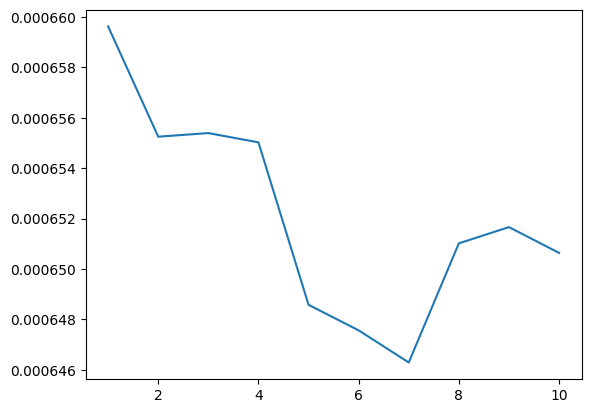

[0.0006596168795339127,
 0.0006552466509155211,
 0.0006553904599488836,
 0.0006550228678280029,
 0.000648582142751374,
 0.000647569328970771,
 0.0006462954772820959,
 0.0006510185128732034,
 0.0006516624112954694,
 0.0006506402642711994]

In [49]:
#Obtain a deep look of the data
Tfull, slopes, intercepts, rCoes,stErr=DeepAnalysis532('../data/Laser_Test_PM_MM_August_2023/')

slopes

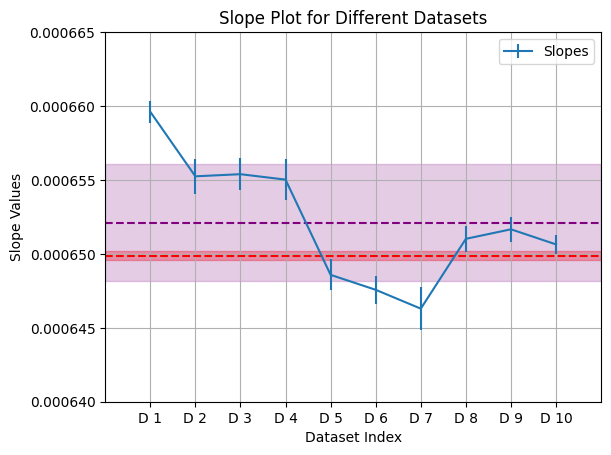

In [61]:
x=Tfull['meanRefPD']
y=Tfull['meanPM']

res = linregress(x, y)

datasets=10 #nfiles
plt.errorbar(range(len(slopes)), slopes,stErr, label='Slopes')

# Customize the plot

plt.title('Slope Plot for Different Datasets')
plt.xlabel('Dataset Index')
plt.ylabel('Slope Values')
plt.xticks(range(datasets), [f'D {i+1}' for i in range(10)])  # Label the x-axis with dataset identifiers
plt.legend()
plt.axhline(y=res.slope, color='red', linestyle='--', label='Horizontal Line at y=m_all')
plt.axhline(y=np.mean(slopes), color='purple', linestyle='--', label='Horizontal Line at y=m_av')
plt.fill_between(range(-1,len(slopes)+1), res.slope-res.stderr, res.slope+res.stderr, color='red', alpha=0.3, label='Shaded Region')
plt.fill_between(range(-1,len(slopes)+1), np.mean(slopes)-np.std(slopes), np.mean(slopes)+np.std(slopes), color='purple', alpha=0.2, label='Shaded Region')

plt.ylim([0.00064, 0.000665])
plt.xlim([-1,10])
plt.grid()
# Show the plot
plt.show()

In [ ]:
# Create diagnostic plots 
def DeepAnalysis1064(folder_path): 
    wavelength = '1064'
    nfile = GetNumberOfFiles(wavelength,folder_path)
    for i in range(1, nfile):
        filename = f'{folder_path}/Laser_{wavelength}_Step_50_Temp_25_PM_MM_G_{i}.txt'
        T = pd.read_csv(filename,delimiter ='\t',header=None)

        # Rename DataFrame columns
        # ºDate    Time    Laser_Current (mA)  Mean_PowerMeter(W)   Std_PowerMeter(W)    Mean_RefPD(V) Std_RefPD(V)    Temp(ºC)    RH(%)   Samples
        T.columns = ['date', 'time', 'LCurrent', 'meanPM', 'stdPM', 'meanRefPD', 'stdRefPD', 'Temp', 'RH', 'samples']

        # Create separate figures for each plot
        
        plt.figure(i)
        plt.errorbar(T['LPower'], T['meanPM'], yerr=T['stdPM'], fmt='.', markersize=10, linewidth=1)
        plt.ylabel('Mean Optical Power (W)')
        plt.xlabel('Laser Power (mW)')
        plt.title(f'Plot G {i}')

        plt.figure(i + 1)
        plt.errorbar(T['LCurrent'], T['meanRefPD'], yerr=T['stdRefPD'], fmt='.', markersize=10, linewidth=1)
        plt.ylabel('Mean ref PD (V)')
        plt.xlabel('Laser Power (mW)')
        plt.title(f'Plot G {i}')

        plt.figure(i + 2)
        plt.errorbar(T['meanRefPD'], T['meanPM'], yerr=T['stdPM'], fmt='.', markersize=10, linewidth=1)
        plt.ylabel('Mean Optical Power (W)')
        plt.xlabel('Mean ref PD (V)')
        plt.title(f'Plot G {i}')

        #Linear fit 
        slope, intercept, r, p, se = linregress(T['meanRefPD'], T['meanPM'])
        slopes = [] 
        intercepts= []
        rCoes = []
        stErr = []

        slopes.append(slope)
        intercepts.append(intercept)
        rCoes.append(r)
        stErr.append(se)

        outputpath =  f'{folder_path}/plots'
        if not os.path.exists(outputpath):
            os.makedirs(outputpath)
            print(f"Directory '{outputpath}' created.")
        else:
            print(f"Directory '{outputpath}' already exists.")

        plt.savefig(f'{outputpath}/Laser_{wavelength}_Step_50_Temp_25_PM_MM_G_{i}.png')  # Display the current figure